In [1]:
"""
Build a machine learning model to predict salary based on experience for a given dataset
"""

'\nBuild a machine learning model to predict salary based on experience for a given dataset\n'

In [2]:
import numpy as np
# import matplotlib.plotly as plt
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt  
import pandas as pd
#imputer to handle missing data 
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
#o check accuracy
from sklearn.metrics import accuracy_score
# to check accuracy
from sklearn.metrics import *
import pickle 
#visualization in 3D
from mpl_toolkits.mplot3d import Axes3D
# ignore warnings
import warnings
warnings.filterwarnings('ignore')
# from Week3.Utility.Util import UtilClass
# from PycharmProjects/Machine-learning/Week9/Util_pk import Load_data
import os, sys
import csv

# imports
from sklearn.model_selection import learning_curve, GridSearchCV
# from sklearn.learning_curve import learning_curve
from sklearn.metrics import explained_variance_score, make_scorer
from sklearn.model_selection import KFold

In [3]:
# load dataset
dataset_original = pd.read_csv ("Salary_Data.csv")
dataset = dataset_original
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
print("Dataset has {} rows and {} Columns".format(dataset.shape[0],dataset.shape[1])) 

Dataset has 30 rows and 2 Columns


In [5]:
# check dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 560.0 bytes


In [6]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.0,5.313333,2.837888,1.1,3.20,4.7,7.70,10.5
Salary,30.0,76003.000000,27414.429785,37731.0,56720.75,65237.0,100544.75,122391.0


In [7]:
# handling missing data if nessesary
dataset.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [8]:
# seperate fetures and label
x_data = dataset.iloc[:, :-1].values
y_data = dataset.iloc[:, 1].values

In [9]:
print("x_data : ", x_data.shape, " y_data : ", y_data.shape)


x_data :  (30, 1)  y_data :  (30,)


In [10]:
# os.mkdir("CSV_files")
def load_data_tocsv(x_test, y_test,file_name):
    #load data to csv file
    myData = x_test
    
    myFile = open('CSV_files/'+file_name, 'w')  
    with myFile:
        writer = csv.writer(myFile)
        writer.writerows(myData)
    
    colnames=['x'] 
    df = pd.read_csv('CSV_files/'+file_name, names=colnames, header=None)
    # inserting column with static value in data frame 
    df.insert(1, "y", y_test)
    
    df.to_csv('CSV_files/'+file_name, index =  False)

In [11]:
def splitdata(x_data, y_data):
    # split train and test data
    x_train, x_test, y_train, y_test = train_test_split(x_data,y_data,test_size = 0.33, random_state=0)
    print("x_train : ", x_train.shape, " x_test : ", x_test.shape)
    
    #load data into csv for test data
   
    load_data_tocsv(x_test, y_test,'test_file.csv')

    # divide train data into train and cross validation 
    x_train_data, x_cv, y_train_data, y_cv = train_test_split(x_train,y_train,test_size = 0.40,random_state=0)
    
     #load data into csv for train and cross validation
    load_data_tocsv(x_train_data, y_train_data,'train_file.csv')
    load_data_tocsv(x_cv, y_cv, 'CValidation_file.csv')
    
    print("x_train_data : ", x_train_data.shape, " x_test_cv : ", x_cv.shape)
    
#     return x_train_data, x_cv, y_train_data, y_cv 

splitdata(x_data, y_data)

x_train :  (20, 1)  x_test :  (10, 1)
x_train_data :  (12, 1)  x_test_cv :  (8, 1)


In [12]:
# load dataset
train_dataset = pd.read_csv ("CSV_files/train_file.csv")
print("Dataset has {} rows and {} Columns".format(train_dataset.shape[0],train_dataset.shape[1])) 

Dataset has 12 rows and 2 Columns


In [13]:
train_dataset.head()

,x,y
0,8.2,113812.0
1,3.2,64445.0
2,6.8,91738.0
3,9.0,105582.0
4,2.2,39891.0


In [14]:
size = len(train_dataset)
cv = KFold(size, shuffle=True)

In [19]:
# Cross Validation

# load dataset
CV_dataset = pd.read_csv ("CSV_files/CValidation_file.csv")
print("Dataset has {} rows and {} Columns".format(CV_dataset.shape[0],CV_dataset.shape[1])) 
# seperate fetures and label
x_cv = CV_dataset.iloc[:,:-1].values
y_cv = CV_dataset.iloc[:,1].values

Dataset has 8 rows and 2 Columns



Module created

Pickle file created


 y_prediction: [104424.65958174  56904.30514559  91118.96033962 112027.91629153
  47400.23425836 126284.02262237  36945.75628241  83515.70362984
  69259.59729899  54053.08387942  45499.42008092  61656.34058921]


Accuracy train 94.87233003146088


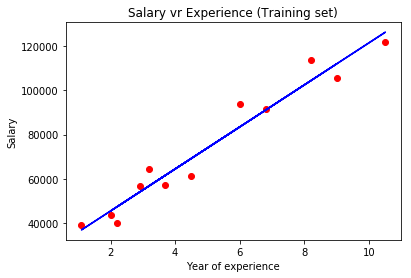

No handles with labels found to put in legend.


(12, 1)
(12,)


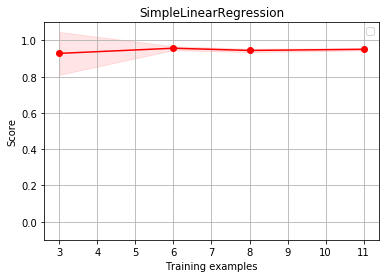

In [22]:
class simpleLR():
    
    def create_module(self,x_train,y_train):
        
        # fitting simple LR to the training set
        regression = LinearRegression()
    #      regression.fit(x_train_data, y_train_data)
        regression.fit(x_train,y_train)
        """
        output-
        LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
             normalize=False)
        """
        return regression
    
    def create_piklefile(self,regression):
        # dump train model pickle file
        file = open('SimpleLRModulefile.pkl', 'wb')
        pickle.dump(regression,file)
        file.close()
        
    def y_prediction(self,regression, x_train):
        # predicting the test set result
        return regression.predict(x_train)
    
    def accuracy(self,y_predict_train,y_train):
        # accuracy using r2 score
        return r2_score(y_predict_train,y_train)*100
    
    def visualization(self,x_train,y_train, y_train_pre):
        # Visualization the training set result
        plt.scatter(x_train,y_train, color = 'red')
        plt.plot(x_train,y_train_pre, color = 'blue')
        plt.title("Salary vr Experience (Training set)")
        plt.xlabel("Year of experience")
        plt.ylabel("Salary")
        plt.show()
        
    def visualization1(self,lg, x,y, y_train_pre):
#         x = np.reshape(np.random.normal(scale=2,size=size),(-1,1))
        print(x.shape)
        # np.random.normal(scale=2,size=size) creates a 1000 x 1 matrix
        # scale=2 is the standard deviation of the distribution
#         np.random.normal(scale=2,size=size).shape
#         y = np.array([[1 - 2*x[0] +x[0]**2] for x in X])
        print(y.shape)
        # Visualization the training set result
        train_sizes, train_scores, test_scores = learning_curve(lg, x, y, n_jobs=-1, cv=cv, train_sizes=np.linspace(.1, 1.0, 5), verbose=0)
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)

        plt.figure()
        plt.title("SimpleLinearRegression")
        plt.legend(loc="best")
        plt.xlabel("Training examples")
        plt.ylabel("Score")
        plt.gca().invert_yaxis()

        # box-like grid
        plt.grid()

        # plot the std deviation as a transparent range at each training set size
        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

        # plot the average training and test score lines at each training set size
        plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

        # sizes the window for readability and displays the plot
        # shows error from 0 to 1.1
        plt.ylim(-.1,1.1)
        plt.show()
        #--------------------------------------------------------------------------------------------
#         plt.scatter(x_train,y_train, color = 'red')
#         plt.plot(x_train,y_train_pre, color = 'blue')
#         plt.title("Salary vr Experience (Training set)")
#         plt.xlabel("Year of experience")
#         plt.ylabel("Salary")
#         plt.show()
        

def main():
    #class obj created
    obj  = simpleLR()
    
    # seperate fetures and label
    x_train = train_dataset.iloc[:,:-1].values
    y_train = train_dataset.iloc[:,1].values  
    
    regression = obj.create_module(x_train,y_train)
    print("\nModule created")
    
    obj.create_piklefile(regression)
    print("\nPickle file created")
    
    y_train_pre = obj.y_prediction(regression, x_train)
    print("\n\n y_prediction:",y_train_pre)
    
    Accuracy_train = obj.accuracy(y_train_pre,y_train)
    print("\n\nAccuracy train", Accuracy_train)
  
    obj.visualization(x_train,y_train,y_train_pre)
    %matplotlib inline
    obj.visualization1(regression, x_train,y_train, y_train_pre)

if __name__ == '__main__':
    main()


In [18]:
# Cross Validation

# load dataset
CV_dataset = pd.read_csv ("CSV_files/CValidation_file.csv")
print("Dataset has {} rows and {} Columns".format(CV_dataset.shape[0],CV_dataset.shape[1])) 


Dataset has 8 rows and 2 Columns


In [ ]:
class Cross_validation():
           
    def y_prediction(self,regression, x_train):
        # predicting the test set result
        return regression.predict(x_train)
    
    def accuracy(self,y_predict_train,y_train):
        # accuracy using r2 score
        return r2_score(y_predict_train,y_train)*100
    
    def visualization(self,x_train,y_train, y_cv_pre):
        # Visualization the training set result
        plt.scatter(x_train,y_train, color = 'red')
        plt.plot(x_train,y_cv_pre, color = 'blue')
        plt.title("Salary vr Experience (Cross Validation set)")
        plt.xlabel("Year of experience")
        plt.ylabel("Salary")
        plt.show()
        

def main():
    #class obj created
    obj  = Cross_validation()
    
    # seperate fetures and label
    x_cv = CV_dataset.iloc[:,:-1].values
    y_cv = CV_dataset.iloc[:,1].values

    #cross validation
    file1 = open('SimpleLRModulefile.pkl', 'rb')
    reg1 = pickle.load(file1)
  
    
    # y_prediction ( cross validation)   
    y_cv_pre = obj.y_prediction(reg1, x_cv)
#     print("\n\n y_prediction:",y_cv_pre)
    
    Accuracy_train = obj.accuracy(y_cv_pre, y_cv)
    print("\n\nAccuracy train", Accuracy_train)

    obj.visualization(x_cv, y_cv, y_cv_pre)

if __name__ == '__main__':
    main()
